In [4]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from os.path import join as oj
import seaborn as sns
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# depending on how much is saved, this may take a while
out_dir = '/scratch/users/vision/chandan/pacmed/test3'
fnames = sorted([fname for fname in os.listdir(out_dir)])
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames)]
results = pd.concat(results_list, axis=1).T.infer_objects()

100%|██████████| 33/33 [00:00<00:00, 183.69it/s]


In [6]:
results.head()

,dset_name,seed,class_weight,model_type,flip_frac,out_dir,pid,uncertainty_probit_flipped_diff_train,uncertainty_probit_flipped_diff_p_train,uncertainty_probit_acc_percentages_train,...,uncertainty_probit_calibration_rmse_test,uncertainty_from_pred_flipped_diff_test,uncertainty_from_pred_flipped_diff_p_test,uncertainty_from_pred_acc_percentages_test,uncertainty_from_pred_acc_performances_test,uncertainty_from_pred_acc_auc_test,uncertainty_from_pred_auc_percentages_test,uncertainty_from_pred_auc_performances_test,uncertainty_from_pred_auc_auc_test,uncertainty_from_pred_calibration_rmse_test
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/test3,25603835464144188052,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.178692,0.006463,0.447253,"[17.66304347826087, 17.934782608695652, 18.206...","[0.01386572957381685, 0.01517121920175163, 0.0...",1608.872645,"[17.66304347826087, 17.934782608695652, 18.206...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",82.059113,0.178692
1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/test3,73823716274716188188,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.195963,0.004017,0.354124,"[17.66304347826087, 17.934782608695652, 18.206...","[62.88665472051457, 64.09126461362612, 65.2956...",17493.476016,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6494252873563219, 0.6472222222222223, 0.645...",47.621426,0.195963
2,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/test3,74172847356704722068,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.077993,-0.020633,0.024919,"[17.66304347826087, 17.934782608695652, 18.206...","[62.92749183736094, 63.750815815430784, 64.574...",17504.857051,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6038095238095238, 0.6046296296296296, 0.605...",47.505671,0.077993
3,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/test3,15700228462542261605,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.062717,0.035463,0.005879,"[17.66304347826087, 17.934782608695652, 18.206...","[63.653127873614615, 64.41889883962357, 65.697...",17500.183548,"[17.66304347826087, 17.934782608695652, 18.206...","[0.6062618595825426, 0.6064516129032258, 0.606...",46.979461,0.062717
4,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,0,1,logistic,0.08,/scratch/users/vision/chandan/pacmed/test3,73747041272657272080,0.0,NaN,"[5.88768115942029, 5.978260869565218, 6.068840...",...,0.070619,-0.001218,0.446540,"[17.66304347826087, 17.934782608695652, 18.206...","[59.852026063101945, 60.69607336291289, 61.541...",17297.611806,"[17.66304347826087, 17.934782608695652, 18.206...","[0.7222222222222222, 0.7203703703703703, 0.722...",51.884761,0.070619


# compare statistics

In [7]:
r = results

In [12]:
r.keys()

Index(['dset_name', 'seed', 'class_weight', 'model_type', 'flip_frac',
       'out_dir', 'pid', 'uncertainty_probit_flipped_diff_train',
       'uncertainty_probit_flipped_diff_p_train',
       'uncertainty_probit_acc_percentages_train',
       'uncertainty_probit_acc_performances_train',
       'uncertainty_probit_acc_auc_train',
       'uncertainty_probit_auc_percentages_train',
       'uncertainty_probit_auc_performances_train',
       'uncertainty_probit_auc_auc_train',
       'uncertainty_probit_calibration_rmse_train',
       'uncertainty_from_pred_flipped_diff_train',
       'uncertainty_from_pred_flipped_diff_p_train',
       'uncertainty_from_pred_acc_percentages_train',
       'uncertainty_from_pred_acc_performances_train',
       'uncertainty_from_pred_acc_auc_train',
       'uncertainty_from_pred_auc_percentages_train',
       'uncertainty_from_pred_auc_performances_train',
       'uncertainty_from_pred_auc_auc_train',
       'uncertainty_from_pred_calibration_rmse_train',


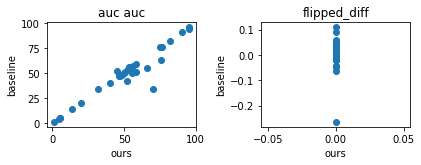

In [19]:
R, C = 2, 2
plt.subplot(R, C, 1)
plt.title('auc auc')
plt.plot(r.uncertainty_probit_auc_auc_test, r.uncertainty_from_pred_auc_auc_test, 'o')
# plt.plot(r.uncertainty_probit_auc_auc_test, r.uncertainty_from_pred_auc_auc_test, 'o')

plt.xlabel('ours')
plt.ylabel('baseline')


plt.subplot(R, C, 2)
plt.title('flipped_diff')
plt.plot(r.uncertainty_probit_flipped_diff_test, r.uncertainty_from_pred_flipped_diff_test, 'o')
# plt.plot(r.uncertainty_probit_auc_auc_test, r.uncertainty_from_pred_auc_auc_test, 'o')

plt.xlabel('ours')
plt.ylabel('baseline')

plt.tight_layout()
plt.show()